# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
     '/Users/Administrator/Desktop/Bittiger/501/yelp_dataset/yelp_academic_dataset_business.json',
    '/Users/Administrator/Desktop/Bittiger/501/yelp_dataset/yelp_academic_dataset_checkin.json',
    '/Users/Administrator/Desktop/Bittiger/501/yelp_dataset/yelp_academic_dataset_review.json',
    '/Users/Administrator/Desktop/Bittiger/501/yelp_dataset/yelp_academic_dataset_tip.json',
    '/Users/Administrator/Desktop/Bittiger/501/yelp_dataset/yelp_academic_dataset_user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


#### Checkin Data

In [6]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."


#### Review Data

In [28]:
#with open(file_review) as f:
#    df_review = pd.DataFrame(json.loads(line) for line in f)
#df_review.head(2)

#### Tip Data

In [8]:
#with open(file_tip) as f:
#    df_tip = pd.DataFrame(json.loads(line) for line in f)
#df_tip.head(2)

#### User Data

In [9]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [10]:
#Create Pandas DataFrame filters

#select business that are located in "Las Vegas"
cond_city = df_business['city'] == "Las Vegas"

#filter null categories
cond_category_not_null = ~df_business["categories"].isnull()

#contain "Restaurants" in category
cond_category_restaurant = df_business["categories"].apply(str).str.contains("Restaurants")



In [11]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restaurant]


#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [12]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [13]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]


In [14]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
avg_stars      6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


In [16]:
df_selected_business.head()

,business_id,name,categories,avg_stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [17]:
df_selected_business.describe()

,avg_stars
count,6148.000000
mean,3.477066
std,0.808917
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


#### Save results to csv files

In [18]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("/Users/Administrator/Desktop/Bittiger/501/Yelp Project/selected_business.csv", 
                            index=False, encoding='utf-8')


In [19]:
# Try reload the csv file to check if everything works fine
pd.read_csv("/Users/Administrator/Desktop/Bittiger/501/Yelp Project/selected_business.csv", 
                            encoding='utf-8').head()

,business_id,name,categories,avg_stars
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
1,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
2,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
3,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
4,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [21]:
#with open(file_review) as f:
#    df_review = pd.DataFrame(json.loads(line) for line in f)
#df_review.head(2)
#df_review

In [25]:
dir_part1 = 'review_'
review_list = [dir_part1 + str(year) + '.json' for year in [2010, 2012, 2014, 2015, 2016, 2017, 2018]]


In [27]:
df_left = df_selected_business.set_index("business_id")

for review_file in review_list: 
    
    #load review data
    with open(review_file) as f:
        df_review = pd.DataFrame(json.loads(line) for line in f)
        
    #prepare the business dataframe and set index to column "business_id", and name it as df_left
    
    
    #prepare the review dataframe and set index to column "business_id", and name it as df_right
    df_right = df_review.set_index("business_id")
    
    #join df_left and df_right
    df_joined.reset_index(inplace=True)
    
    print(review_file + "  complete")
    
    #concat data
    if "2010" in review_file:
        df_final = df_joined
    else:
        df_final = pd.concat([df_final, df_joined]) 
     
    # free some memory, reset the index
    del df_review 
    del df_right
    del df_joined


FileNotFoundError: [Errno 2] No such file or directory: 'review_2010.json'

#### Prepare dataframes to be joined, - on business_id

In [23]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.info()
#df_left

<class 'pandas.core.frame.DataFrame'>
Index: 6148 entries, vJIuDBdu01vCA8y1fwR1OQ to 0zGeYN8ReYwVj27U7EHOJA
Data columns (total 3 columns):
name          6148 non-null object
categories    6148 non-null object
avg_stars     6148 non-null float64
dtypes: float64(1), object(2)
memory usage: 192.1+ KB


In [29]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')
df_review.info()
df_right.info()
#df_right

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 5996996 entries, iCQpiavjjPzJ5_3gPD5Ebg to 6E4i0NHTRAgpwbbRwZhlnw
Data columns (total 8 columns):
cool         int64
date         object
funny        int64
review_id    object
stars        int64
text         object
useful       int64
user_id      object
dtypes: int64(4), object(4)
memory usage: 411.8+ MB


#### Join! and reset index

In [31]:
# Join df_left and df_right. What type of join?
# inner join
df_join = df_left.join(df_right, how='inner')

In [32]:
# You may want to reset the index 
df_join.reset_index(inplace=True)

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [33]:
# Make a filter that selects date after 2015-01-20
dataFilter = df_join['date'] > u'2015-01-20'

In [34]:
# Filter the joined DataFrame and name it as df_final
df_final = df_join[dataFilter]

#### Take a glance at the final dataset

* Do more EDA here as you like!

In [35]:
df_final.head(10)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
17,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA
23,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-05-30,0,-vC7STnfwQuR6DgX3CsfnQ,5,Started off with a Chimay Blue beer and Gumbo ...,0,knB3eczyruOuZaP3TKUKew
27,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g
31,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg
33,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-05-01,0,uib8fDEAF0xiiPHY5KrpRQ,3,I REALLY wanted to love Delmonicos. I made res...,0,4DrtQoV20cbDOlnOk_rxHw
35,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-06-13,0,sRXpmPl7q9JFXehiJuBUlA,5,The most amazing French onion soup I've ever h...,0,rhP3yu4Sxpj9OXgeY0VpLg


In [36]:
df_final.describe()

,avg_stars,cool,funny,stars,useful
count,640718.000000,640718.000000,640718.000000,640718.000000,640718.000000
mean,3.827728,0.611837,0.455651,3.821948,0.984984
std,0.593887,2.886282,2.229470,1.421403,3.396315
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.500000,0.000000,0.000000,3.000000,0.000000
50%,4.000000,0.000000,0.000000,4.000000,0.000000
75%,4.000000,0.000000,0.000000,5.000000,1.000000
max,5.000000,227.000000,202.000000,5.000000,236.000000


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640718 entries, 1 to 1053033
Data columns (total 12 columns):
business_id    640718 non-null object
name           640718 non-null object
categories     640718 non-null object
avg_stars      640718 non-null float64
cool           640718 non-null int64
date           640718 non-null object
funny          640718 non-null int64
review_id      640718 non-null object
stars          640718 non-null int64
text           640718 non-null object
useful         640718 non-null int64
user_id        640718 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 63.5+ MB


In [38]:
import matplotlib.pyplot as plt

% matplotlib inline

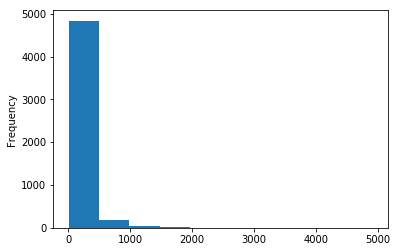

In [39]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final.groupby(by='business_id')['review_id'].count().plot.hist()

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [42]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('/Users/Administrator/Desktop/Bittiger/501/Yelp Project/last_2_years_restaurant_reviews.csv', 
                index=False, encoding='utf-8')


In [43]:
df_final.shape

(640718, 12)